# Assignment 1

First we need to import a few modules, execute the cell below:

In [48]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [49]:
def f(x):
    return numpy.cos(x)


  


You can use the following cell to check that your code works for scalar arguments:

In [50]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [51]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [52]:
def df_analytic(x):
    return -numpy.sin(x)

In [53]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [54]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [55]:
def backward_difference(f, x, dx):
    return (-f(x-dx)+f(x))/dx
   

In [56]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


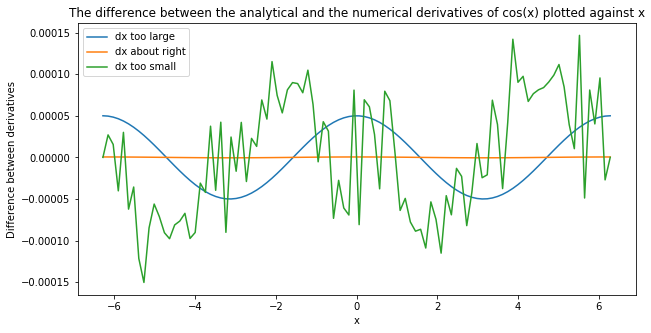

In [60]:
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
df_dx_1 = backward_difference(f, xs, dx=1e-4)
df_dx_2 = backward_difference(f, xs, dx=1e-6)
df_dx_3 = backward_difference(f, xs, dx=1e-12)
df_dx_analytical = df_analytic(xs)
plt.figure(figsize=(10, 5))
plt.plot(xs, df_dx_1 - df_dx_analytical,label= 'dx too large')
plt.plot(xs, df_dx_2 - df_dx_analytical,label= 'dx about right')
plt.plot(xs, df_dx_3 - df_dx_analytical,label= 'dx too small')
plt.xlabel("x")
plt.ylabel("Difference between derivatives")
plt.title("The difference between the analytical and the numerical derivatives of cos(x) plotted against x")
plt.legend()

plt.show()

**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


When Δx is too small the numerical method loses accuracy, as computers can only save numbers with finite precision. This is because Δx has been truncated much closer to the first significant figure (due to the finite precison) making a much bigger difference to the result, than it would for a larger Δx, where this truncation occurs many more significant figures into the number. This results in massive fluctuations from the analytical derivative.

When Δx is too large the numerical method does not work properly as dx is not sufficiently small compared to x and f(x). The resulting numerical derivative is, in this case, not the proper sinusodial curve that it should be, it is probably a less pronounced version (or if dx is really large, 0). This means the difference between the derivatives gives a sinusodial curve not 0, as the numerical derivative does not properly cancel out the sinusodial curve of the analytic derivative.